<a href="https://colab.research.google.com/github/swaragandhi5/Shubhlaxmi/blob/master/A2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Question 3 

**Designing Radial Basis Function (RBF) - Neural Network based on Gaussian Kernel Funtion** 


*   It is a feed forward network for classification of non-linear data. 
*   It has one hidden layer.



In [ ]:
#Importing all the important libraries. 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from scipy.linalg import norm, pinv

Preparing Training and Testing data



In [ ]:
x = []
xi = []
xj = []
y = []

for i in range(0,21):
  for j in range(0,21):
    x_i = round(-2+0.2*i,1)
    x_j = round(-2+0.2*j,1)
    
    if (x_i >= -2) and (x_i <= 2) and (x_j >= -2) and (x_j <= 2):
      xi.append(x_i)
      xj.append(x_j)
      x.append(np.array([x_i,x_j]))

      y_i = (x_i**2) + (x_j**2)

      if y_i <= 1:
        y.append(1)
      else:
        y.append(-1)
random.shuffle(x)
x_data = np.array(x)
y_data = np.array(y)
#Printing specific number of output so have a look on how data looks. 
print(x_data[:10]) 
print(y_data)



[[ 0.  -0.8]
 [ 1.8  0.6]
 [-0.6  0. ]
 [ 0.2  1.6]
 [ 0.2 -1.6]
 [ 1.2 -2. ]
 [ 1.2  0. ]
 [ 2.  -2. ]
 [-0.4  0.6]
 [ 0.2 -0.6]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1

Splitting the data into train and test i.e 80% and 20% where training data is 352 and testing is 89 to be specific. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=81)
x_train.shape

(352, 2)

 The general form taken by the RBF function is the Guassian Kernel Function. 
The experssion for Gaussian function is as follows:

> 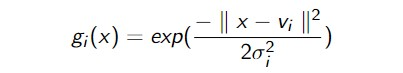


 

*   v is vector denoting centre of function.
*   σ is the variance that is width parameter. 

*   x is the input 




In [ ]:
import enum
#Guassian kernel function G, is calculated here:  

def G(x_train,c,s):
  gauss_matrix = np.zeros((x_train.shape[0],c.shape[0]),float)
  for c_ind, centre in enumerate(c):
    for train_ind,train_d in enumerate(x_train):
      distance = norm(train_d-centre)**2
      measure = np.exp(-distance/(2*(s**2)))
      gauss_matrix[train_ind,c_ind] = measure

  return gauss_matrix



We have,

 $D = GW$

$G=G^{-1} D$

G is not a square matrix and so W is expressed as:

$W = G^+ D$


$G^+$ denotes pseudo inverse matrix of G 




In [ ]:
#Weight matrix has been calculated here: 
def W(x_train,c,s,y_train):
  input_g = G(x_train,c,s)
  weight = np.dot(pinv(input_g),y_train)
  return weight

#Now we will calculate the output of the RBF network by the function named Output
def Output(x_train,c,s,weight):
  testing = G(x_train,c,s)
  output = np.dot(testing,weight)
  return output

In [ ]:
from os import error
s_values = [0.01,0.02,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,5,10]
accuracy = []
error_rate = []

for v in s_values:
  weight = W(x_train,x_train,v,y_train)
  y_output = Output(x_test,x_train,v,weight)
  y_pred = np.sign(y_output)
  acc = np.mean(y_test == y_pred)
  accuracy.append(acc)
  err = np.square(y_test - y_pred).mean()
  error_rate.append(err)

print("Values of Sigma:",s_values)
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Values of Sigma: [0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10]
Accuracy: [0.651685393258427, 0.6853932584269663, 0.6853932584269663, 0.651685393258427, 0.5280898876404494, 0.47191011235955055, 0.5168539325842697, 0.5730337078651685, 0.550561797752809, 0.6292134831460674, 0.6741573033707865, 0.6179775280898876, 0.7752808988764045, 0.7752808988764045]
Error rate: [1.3932584269662922, 1.2584269662921348, 1.2584269662921348, 1.3932584269662922, 1.8876404494382022, 2.1123595505617976, 1.9325842696629214, 1.7078651685393258, 1.797752808988764, 1.4831460674157304, 1.303370786516854, 1.5280898876404494, 0.898876404494382, 0.898876404494382]


Text(0, 0.5, 'Accuracy')

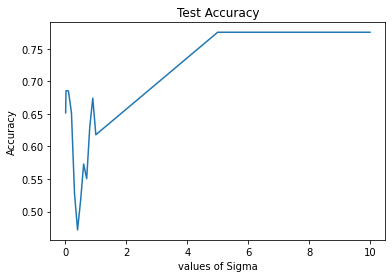

In [ ]:
#Plotting the graph for sigma value and corresponding accuracy
plt.plot(s_values,accuracy)
plt.title("Test Accuracy")
plt.xlabel("values of Sigma")
plt.ylabel("Accuracy")


Text(0, 0.5, 'Error - Mean Squared Error')

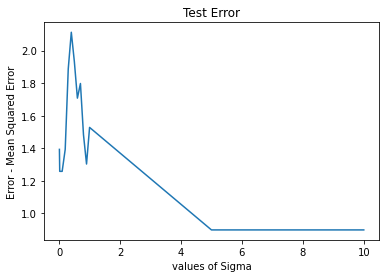

In [ ]:
#Plotting graph for sigma values and corresponding error rate
plt.plot(s_values,error_rate)
plt.title("Test Error")
plt.xlabel("values of Sigma")
plt.ylabel("Error - Mean Squared Error")


### Q3-Part 1 - All the datapoints are considered as centres 
*   It is evident from the graph of Accuracy and Sigma that the accuracy of network starts with a good percentage of around 75 and then after sigma value crosses 0.2, the accuraccy keeps decreasing to around 50% and then take up the peak after 0.8 and increases till 5 and remains contant after that.So we can choose the value of sigma as 5 as it gives the best accuracy of 77%. 


*    From the Graph of error and sigma shows the similar trend. The lowest error is at the value 5, and then remains constant. The worst case is between 0 and 1.     



### Q3-Part 2a - Choosing randomly 150 centre. 

In [ ]:
#Now for Q3-Part 2a
X_train = x_train.tolist()
#Here we randomly choose 150 centres and converting to array.  
random_c = random.sample(X_train,150)
random_C = np.array(random_c)
#We update the weights
w_150 = W(x_train,random_C,5,y_train)
y_output_150 = Output(x_test,random_C,5,w_150)
#We predict the new output based on the choosen centres.
y_pred_150 = np.sign(y_output_150)
#The accuracy and error has been perdicted 
err_150 = np.square(y_test - y_pred_150).mean()
acc_150 = round(np.mean(y_test == y_pred_150),4)

print("Accuracy is",acc_150)
print("Error rate is",err_150)


Accuracy is 0.7753
Error rate is 0.898876404494382


Here we see that the accuracy is decreases a little bit compared to the previous network where all the datapoints were considered as the centre.Here 150 centres are chosen randomly and so the error has hiked up a lot to 0.89. 
This shows that the previous network was better.  

### Q3-Part 2b - Choosing 150 data centres using K-Means clustering.

In [ ]:
#Now for Q3-Part 2b
#Predefined function is available for performing K-Means.
kmean = KMeans(n_clusters=150, random_state=275).fit(x_train)
c_k = kmean.cluster_centers_
C_k = np.array(c_k)
#Again updating the weights according to the centres selected by K-Means
#Value of sigma has been considered 5 as it gave the best accuracy in Part 1
w_k = W(x_train,C_k,5,y_train)
y_output_k = Output(x_test,C_k,5,w_k)
y_pred_k = np.sign(y_output_k)
#Calculating the accuracy and error to quantify the network 
err_k = np.square(y_test - y_pred_k).mean()
acc_k = round(np.mean(y_test == y_pred_k),4)

print("Accuracy using K-means is",acc_k)
print("Error rate using K-means is",err_k)

Accuracy using K-means is 0.7753
Error rate using K-means is 0.898876404494382


The Acccuracy and Error rate is the same as the previous network where 150 cluseters were chosen randomly. Though it can be observed that the accuracy has not been decreased from Case 1. 